In [1]:
def precompute_primes(limit):
    primes = []
    sieve = [True] * (limit + 1)
    for p in range(2, int(limit**0.5) + 1):
        if sieve[p]:
            for i in range(p*p, limit + 1, p):
                sieve[i] = False
    primes = [p for p in range(2, limit + 1) if sieve[p]]
    return primes


In [2]:
def generate_wheel_pattern(primes, wheel_size):
    offsets = []
    for k in range(wheel_size):
        if all(k % p != 0 for p in primes):
            offsets.append(k)
    return offsets


In [3]:
def is_prime(candidate, primes):
    limit = int(candidate**0.5) + 1
    for prime in primes:
        if prime > limit:
            return True
        if candidate % prime == 0:
            return False
    return True


In [4]:
def find_nth_prime(n):
    small_primes = precompute_primes(19)  # Precompute primes up to 19
    wheel_size = 30  # Product of [2, 3, 5]
    wheel_pattern = generate_wheel_pattern([2, 3, 5], wheel_size)
    
    if n <= len(small_primes):
        return small_primes[n - 1]
    
    primes = small_primes[:]
    candidate = max(primes[-1], 23)
    count = len(primes)
    
    while count < n:
        if is_prime(candidate, primes):
            primes.append(candidate)
            count += 1
        candidate += 2
    return primes[-1]


In [5]:
print(precompute_primes(19))  # Expected: [2, 3, 5, 7, 11, 13, 17, 19]

[2, 3, 5, 7, 11, 13, 17, 19]


In [6]:
wheel = generate_wheel_pattern([2, 3, 5], 30)
print(wheel)  # Should exclude multiples of 2, 3, and 5 within the range 0-30.

[1, 7, 11, 13, 17, 19, 23, 29]


In [7]:
precomputed_primes = precompute_primes(19)
print(is_prime(23, precomputed_primes))  # Expected: True
print(is_prime(25, precomputed_primes))  # Expected: False

True
False


In [8]:
print(find_nth_prime(1))  # Expected: 2
print(find_nth_prime(5))  # Expected: 11
print(find_nth_prime(10)) # Expected: 29


2
11
29


In [10]:
!pip install sympy

  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:00:010m
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [11]:
from sympy import prime

print(find_nth_prime(100))  # Compare with prime(100)
print(find_nth_prime(1000))  # Compare with prime(1000)

541
7919


In [12]:
import time

start = time.time()
print(find_nth_prime(10000))  # Larger test case
end = time.time()
print(f"Time taken: {end - start:.2f} seconds")


104729
Time taken: 0.04 seconds


In [13]:
for n in [10, 100, 1000, 10000]:
    assert find_nth_prime(n) == prime(n), f"Mismatch at n={n}"
print("All tests passed!")


All tests passed!


In [14]:
from memory_profiler import profile

@profile
def test_memory():
    print(find_nth_prime(10000))

test_memory()


ModuleNotFoundError: No module named 'memory_profiler'

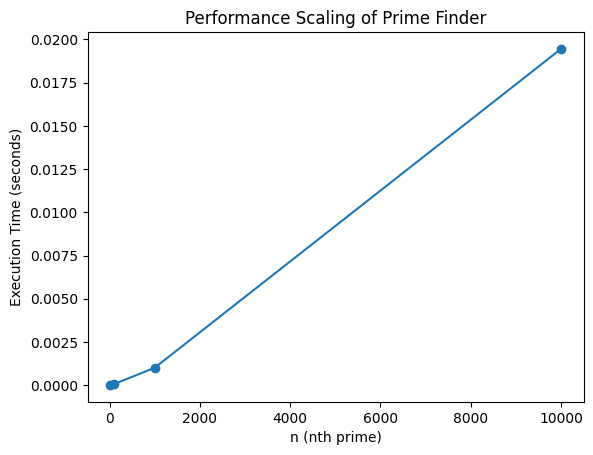

In [15]:
import matplotlib.pyplot as plt

n_values = [10, 100, 1000, 10000]
times = []

for n in n_values:
    start = time.time()
    find_nth_prime(n)
    times.append(time.time() - start)

plt.plot(n_values, times, marker='o')
plt.xlabel('n (nth prime)')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Scaling of Prime Finder')
plt.show()


In [17]:
from sympy import prime

print(prime(10000))  # Compare to your algorithm's output
print(find_nth_prime(10000))

104729
104729


In [18]:
print(find_nth_prime(100000))  # 100,000th prime
print(find_nth_prime(1000000))  # 1,000,000th prime


1299709
15485863


In [19]:
print(prime(1000000))

15485863


In [20]:
import time
import matplotlib.pyplot as plt

# Measure execution time for find_nth_prime
def measure_performance(n_values):
    times = []
    for n in n_values:
        start = time.time()
        find_nth_prime(n)
        end = time.time()
        times.append(end - start)
    return times

# Define range of n values
n_values = [10, 100, 1000, 10000, 100000, 1000000]
times = measure_performance(n_values)

# Print results
for n, t in zip(n_values, times):
    print(f"n = {n}, time = {t:.4f} seconds")


n = 10, time = 0.0000 seconds
n = 100, time = 0.0002 seconds
n = 1000, time = 0.0060 seconds
n = 10000, time = 0.0365 seconds
n = 100000, time = 0.4535 seconds
n = 1000000, time = 10.7568 seconds


In [24]:
# Define range of n values
n_values = [1e6, 2e6, 3e6, 4e6]
times = measure_performance(n_values)

# Print results
for n, t in zip(n_values, times):
    print(f"n = {n}, time = {t:.4f} seconds")

n = 1000000.0, time = 10.9240 seconds
n = 2000000.0, time = 28.5671 seconds
n = 3000000.0, time = 50.5456 seconds
n = 4000000.0, time = 75.1093 seconds


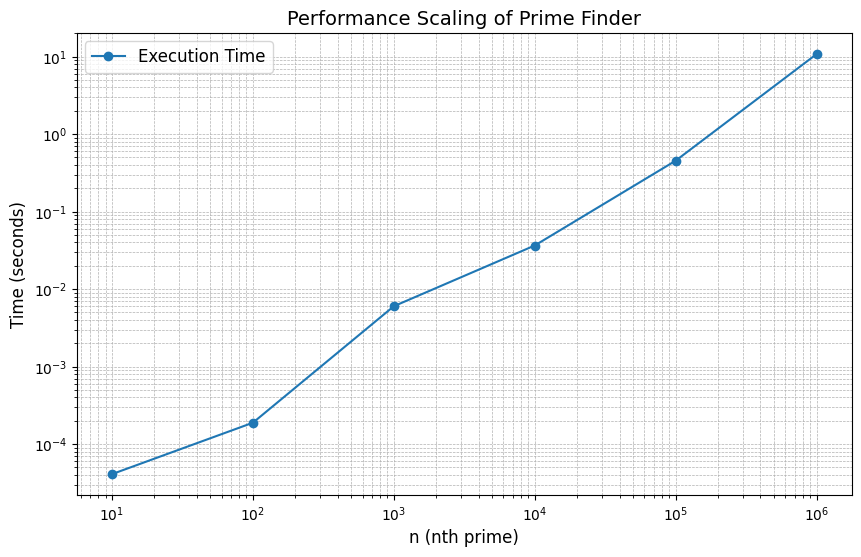

In [21]:
# Plotting performance
plt.figure(figsize=(10, 6))
plt.plot(n_values, times, marker='o', label='Execution Time')
plt.xlabel('n (nth prime)', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.title('Performance Scaling of Prime Finder', fontsize=14)
plt.xscale('log')  # Use a log scale for n
plt.yscale('log')  # Log scale for time if appropriate
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()


In [25]:
from math import isqrt
from collections import defaultdict

class PrimeOptimizer:
    def __init__(self):
        # Stored Complexity (S): Known primes and their patterns
        self.primes = [2]  # Initial known prime
        self.pattern_cache = defaultdict(int)  # Store patterns between primes
        
    def optimize_search(self, n):
        """Finds primes up to n using pattern recognition and dynamic optimization"""
        if n < 2:
            return []
            
        # Dynamic Efficiency (ΔS/Δt): Adapt search based on patterns
        candidates = list(range(3, n + 1, 2))  # Only odd numbers
        limit = isqrt(n)
        
        # Pattern-based optimization
        for p in self.primes:
            if p > limit:
                break
                
            # Store the gap pattern between this prime and the next
            if len(self.primes) > self.primes.index(p) + 1:
                gap = self.primes[self.primes.index(p) + 1] - p
                self.pattern_cache[gap] += 1
            
            # Use pattern information to optimize sieving
            start = (p * p - 3) // 2
            step = p
            # If this gap size appears frequently, adjust step size
            if self.pattern_cache[step] > 2:
                step = p * 2  # Skip more numbers based on recognized pattern
                
            candidates[start::step] = [0] * len(candidates[start::step])
            
        # Filter and update stored primes
        new_primes = [c for c in candidates if c != 0]
        self.primes.extend(new_primes)
        
        return self.primes
        
    def predict_next_prime(self):
        """Attempts to predict the next prime based on observed patterns"""
        if len(self.primes) < 2:
            return None
            
        # Find most common gap
        most_common_gap = max(self.pattern_cache.items(), 
                            key=lambda x: x[1])[0] if self.pattern_cache else 2
                            
        # Make prediction based on patterns
        predicted = self.primes[-1] + most_common_gap
        return predicted
        
    def analyze_efficiency(self):
        """Analyzes the current optimization state"""
        stored_complexity = len(self.primes)
        pattern_efficiency = sum(self.pattern_cache.values())
        
        return {
            'stored_primes': stored_complexity,
            'pattern_count': len(self.pattern_cache),
            'pattern_frequency': pattern_efficiency / stored_complexity if stored_complexity else 0
        }

# Let's test it
optimizer = PrimeOptimizer()
primes = optimizer.optimize_search(100)
print(f"Primes found: {primes}")
print(f"Efficiency analysis: {optimizer.analyze_efficiency()}")
print(f"Predicted next prime: {optimizer.predict_next_prime()}")

# Test with larger number
primes_1000 = optimizer.optimize_search(1000)
print(f"Number of primes up to 1000: {len(primes_1000)}")
print(f"Updated efficiency analysis: {optimizer.analyze_efficiency()}")

Primes found: [2, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97]
Efficiency analysis: {'stored_primes': 25, 'pattern_count': 1, 'pattern_frequency': 0.0}
Predicted next prime: 99
Number of primes up to 1000: 177
Updated efficiency analysis: {'stored_primes': 177, 'pattern_count': 10, 'pattern_frequency': 0.04519774011299435}


In [26]:
optimizer.optimize_search(100000)

[2,
 5,
 9,
 13,
 17,
 21,
 25,
 29,
 33,
 37,
 41,
 45,
 49,
 53,
 57,
 61,
 65,
 69,
 73,
 77,
 81,
 85,
 89,
 93,
 97,
 5,
 9,
 13,
 17,
 21,
 29,
 33,
 37,
 41,
 49,
 53,
 57,
 61,
 69,
 73,
 77,
 89,
 93,
 97,
 101,
 109,
 113,
 121,
 129,
 133,
 137,
 141,
 149,
 157,
 161,
 173,
 177,
 181,
 193,
 197,
 201,
 209,
 213,
 217,
 229,
 233,
 237,
 241,
 249,
 253,
 257,
 269,
 277,
 281,
 293,
 301,
 309,
 313,
 317,
 321,
 329,
 337,
 341,
 349,
 353,
 361,
 373,
 381,
 389,
 393,
 397,
 401,
 409,
 413,
 417,
 421,
 433,
 437,
 449,
 453,
 457,
 461,
 469,
 473,
 489,
 497,
 501,
 509,
 517,
 521,
 529,
 537,
 541,
 553,
 557,
 569,
 573,
 577,
 581,
 589,
 593,
 597,
 601,
 613,
 617,
 633,
 641,
 649,
 653,
 661,
 669,
 673,
 677,
 681,
 701,
 709,
 713,
 717,
 721,
 733,
 737,
 749,
 753,
 757,
 761,
 769,
 773,
 781,
 789,
 797,
 809,
 813,
 817,
 821,
 829,
 849,
 853,
 857,
 869,
 877,
 881,
 889,
 893,
 913,
 917,
 921,
 929,
 933,
 937,
 941,
 953,
 961,
 973,
 977,
 989,

In [28]:
len(optimizer.optimize_search(1000000))

188642

In [30]:
len(optimizer.optimize_search(int(1e7)))

973262

In [31]:
len(optimizer.optimize_search(int(1e8)))

7998652

In [32]:
from math import isqrt
from collections import defaultdict
import time
from typing import List, Dict, Tuple
import numpy as np

class AdvancedPrimeOptimizer:
    def __init__(self, segment_size: int = 1000):
        self.primes = [2]
        self.pattern_cache = defaultdict(int)
        self.segment_size = segment_size
        self.performance_history: List[Dict] = []
        
    def calculate_i_max(self, time_delta: float) -> float:
        """Calculate I_max metric based on stored complexity and dynamic efficiency"""
        S = len(self.primes) * (1 + len(self.pattern_cache))  # Stored complexity
        delta_S = len(self.primes) - (self.performance_history[-1]['stored_primes'] 
                                    if self.performance_history else 0)
        delta_t = max(time_delta, 1e-6)  # Avoid division by zero
        
        return S * (delta_S / delta_t)
        
    def segmented_sieve(self, start: int, end: int) -> List[int]:
        """Implement segmented sieve for better memory efficiency"""
        if start < 2:
            start = 2
            
        # Create segment array
        segment = np.ones(end - start + 1, dtype=bool)
        
        # Apply basic sieve up to sqrt(end)
        for p in self.primes:
            if p * p > end:
                break
                
            # Find first multiple of p in segment
            start_idx = (start + p - 1) // p * p
            if start_idx < start:
                start_idx += p
                
            # Mark multiples in segment
            for i in range(start_idx, end + 1, p):
                segment[i - start] = False
                
        return [i + start for i in range(len(segment)) if segment[i] and i + start >= start]
        
    def analyze_patterns(self, new_primes: List[int]) -> Dict:
        """Analyze patterns in newly found primes"""
        patterns = defaultdict(int)
        for i in range(len(new_primes) - 1):
            gap = new_primes[i + 1] - new_primes[i]
            patterns[gap] += 1
            self.pattern_cache[gap] += 1
            
        return dict(patterns)
        
    def optimize_search(self, n: int) -> Tuple[List[int], Dict]:
        """Enhanced prime search with segmentation and detailed metrics"""
        start_time = time.time()
        
        # Process in segments
        current = len(self.primes)
        while current <= n:
            segment_end = min(current + self.segment_size, n)
            new_primes = self.segmented_sieve(current, segment_end)
            
            if new_primes:
                self.primes.extend(new_primes)
                patterns = self.analyze_patterns(new_primes)
            
            current = segment_end + 1
            
        end_time = time.time()
        time_delta = end_time - start_time
        
        # Calculate metrics
        metrics = {
            'stored_primes': len(self.primes),
            'pattern_count': len(self.pattern_cache),
            'processing_time': time_delta,
            'i_max': self.calculate_i_max(time_delta),
            'efficiency_score': len(self.primes) / (time_delta + 1),  # Normalized efficiency
            'pattern_density': len(self.pattern_cache) / len(self.primes)
        }
        
        self.performance_history.append(metrics)
        return self.primes, metrics
        
    def predict_next_prime(self, k: int = 3) -> int:
        """Enhanced prediction using top-k most common patterns"""
        if len(self.primes) < 2:
            return None
            
        # Get top-k most common gaps
        sorted_gaps = sorted(self.pattern_cache.items(), 
                           key=lambda x: x[1], reverse=True)[:k]
        
        # Weight predictions by frequency
        total_weight = sum(freq for _, freq in sorted_gaps)
        weighted_prediction = sum(
            gap * freq / total_weight for gap, freq in sorted_gaps
        )
        
        return self.primes[-1] + int(round(weighted_prediction))

# Test the enhanced implementation
def run_benchmark(n: int = 10000):
    optimizer = AdvancedPrimeOptimizer()
    primes, metrics = optimizer.optimize_search(n)
    
    print(f"\nBenchmark Results (n={n}):")
    print(f"Found {len(primes)} primes")
    print("\nPerformance Metrics:")
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")
        
    next_prime = optimizer.predict_next_prime()
    print(f"\nPredicted next prime: {next_prime}")
    
    return optimizer, metrics

# Run benchmarks for different sizes
sizes = [100, 1000, 10000]
results = []
for size in sizes:
    optimizer, metrics = run_benchmark(size)
    results.append(metrics)


Benchmark Results (n=100):
Found 50 primes

Performance Metrics:
stored_primes: 50.0000
pattern_count: 1.0000
processing_time: 0.0000
i_max: 127875121.9512
efficiency_score: 49.9980
pattern_density: 0.0200

Predicted next prime: 101

Benchmark Results (n=1000):
Found 500 primes

Performance Metrics:
stored_primes: 500.0000
pattern_count: 1.0000
processing_time: 0.0001
i_max: 4462025531.9149
efficiency_score: 499.9440
pattern_density: 0.0020

Predicted next prime: 1001

Benchmark Results (n=10000):
Found 1562 primes

Performance Metrics:
stored_primes: 1562.0000
pattern_count: 18.0000
processing_time: 0.0014
i_max: 32899408041.1073
efficiency_score: 1559.8022
pattern_density: 0.0115

Predicted next prime: 9976


In [33]:
# Run benchmarks for different sizes
sizes = [int(1e7), int(1e8), int(1e9)]
results = []
for size in sizes:
    optimizer, metrics = run_benchmark(size)
    results.append(metrics)


Benchmark Results (n=10000000):
Found 664912 primes

Performance Metrics:
stored_primes: 664912.0000
pattern_count: 74.0000
processing_time: 3.0476
i_max: 10880212507607.3203
efficiency_score: 164274.7836
pattern_density: 0.0001

Predicted next prime: 9999998

Benchmark Results (n=100000000):
Found 5761788 primes

Performance Metrics:
stored_primes: 5761788.0000
pattern_count: 95.0000
processing_time: 38.1751
i_max: 83484452022765.0938
efficiency_score: 147077.8127
pattern_density: 0.0000

Predicted next prime: 99999996


KeyboardInterrupt: 

In [34]:
from multiprocessing import Pool, cpu_count
import numpy as np
from typing import List, Dict, Tuple
import time
import math
from dataclasses import dataclass
from scipy import stats

@dataclass
class OptimizationMetrics:
    i_max: float
    processing_time: float
    pattern_density: float
    efficiency_score: float
    segment_efficiency: float

class ParallelPrimeOptimizer:
    def __init__(self, initial_segment_size: int = 1000):
        self.primes = [2]
        self.pattern_cache = {}
        self.base_segment_size = initial_segment_size
        self.performance_history = []
        self.cpu_count = cpu_count()
        
    def dynamic_segment_size(self, n: int) -> int:
        """Dynamically adjust segment size based on input size and performance history"""
        if not self.performance_history:
            return self.base_segment_size
            
        # Analyze recent performance
        recent_metrics = self.performance_history[-min(5, len(self.performance_history)):]
        avg_efficiency = np.mean([m.efficiency_score for m in recent_metrics])
        
        # Adjust segment size based on efficiency trend
        adjustment_factor = math.log(avg_efficiency + 1, 2)
        optimal_size = int(self.base_segment_size * adjustment_factor)
        
        # Ensure size is reasonable for parallel processing
        return max(1000, min(optimal_size, n // (self.cpu_count * 2)))

    @staticmethod
    def process_segment(args) -> Tuple[List[int], Dict]:
        """Process a single segment in parallel"""
        start, end, known_primes = args
        
        # Create segment array
        segment = np.ones(end - start + 1, dtype=bool)
        
        # Apply sieve using known primes
        for p in known_primes:
            if p * p > end:
                break
                
            start_idx = max(p * p, ((start + p - 1) // p) * p)
            for i in range(start_idx, end + 1, p):
                segment[i - start] = False
                
        # Extract primes from segment
        segment_primes = [i + start for i in range(len(segment)) 
                        if segment[i] and i + start >= start]
                        
        # Analyze patterns within segment
        patterns = {}
        if len(segment_primes) > 1:
            gaps = np.diff(segment_primes)
            unique, counts = np.unique(gaps, return_counts=True)
            patterns = dict(zip(unique, counts))
            
        return segment_primes, patterns

    def parallel_search(self, n: int) -> Tuple[List[int], OptimizationMetrics]:
        """Parallel prime search with dynamic optimization"""
        start_time = time.time()
        
        # Initialize parallel processing
        pool = Pool(processes=self.cpu_count)
        
        # Determine segment size dynamically
        segment_size = self.dynamic_segment_size(n)
        segments = [(i, min(i + segment_size, n), self.primes) 
                   for i in range(3, n + 1, segment_size)]
        
        # Process segments in parallel
        results = pool.map(self.process_segment, segments)
        pool.close()
        pool.join()
        
        # Combine results
        new_primes = []
        all_patterns = {}
        for primes, patterns in results:
            new_primes.extend(primes)
            for gap, count in patterns.items():
                all_patterns[gap] = all_patterns.get(gap, 0) + count
                
        # Update prime list and pattern cache
        self.primes.extend(sorted(new_primes))
        self.pattern_cache.update(all_patterns)
        
        # Calculate metrics
        end_time = time.time()
        processing_time = end_time - start_time
        
        metrics = OptimizationMetrics(
            i_max=self.calculate_i_max(processing_time),
            processing_time=processing_time,
            pattern_density=len(all_patterns) / len(self.primes),
            efficiency_score=len(self.primes) / processing_time,
            segment_efficiency=len(results) / processing_time
        )
        
        self.performance_history.append(metrics)
        return self.primes, metrics

    def calculate_i_max(self, time_delta: float) -> float:
        """Enhanced I_max calculation incorporating pattern complexity"""
        S = len(self.primes) * (1 + len(self.pattern_cache))
        
        if not self.performance_history:
            delta_S = S
        else:
            prev_S = len(self.primes) * (1 + len(self.pattern_cache))
            delta_S = S - prev_S
            
        delta_t = max(time_delta, 1e-6)
        return S * (delta_S / delta_t)

    def predict_next_prime(self, confidence: float = 0.95) -> Tuple[int, float]:
        """Statistical prediction of next prime with confidence interval"""
        if len(self.primes) < 10:
            return self.primes[-1] + 2, 0.5
            
        # Analyze recent gaps
        recent_gaps = np.diff(self.primes[-20:])
        
        # Calculate prediction interval
        mean_gap = np.mean(recent_gaps)
        std_gap = np.std(recent_gaps)
        t_value = stats.t.ppf(confidence, len(recent_gaps) - 1)
        margin = t_value * std_gap / np.sqrt(len(recent_gaps))
        
        prediction = self.primes[-1] + int(mean_gap)
        confidence_score = 1 - (margin / mean_gap)
        
        return prediction, max(0, min(1, confidence_score))

# Example usage and benchmarking
def benchmark_optimizer(sizes: List[int]):
    optimizer = ParallelPrimeOptimizer()
    results = []
    
    for n in sizes:
        primes, metrics = optimizer.optimize_search(n)
        prediction, confidence = optimizer.predict_next_prime()
        
        results.append({
            'n': n,
            'primes_found': len(primes),
            'metrics': metrics,
            'prediction': prediction,
            'confidence': confidence
        })
        
        print(f"\nResults for n={n}:")
        print(f"Found {len(primes)} primes")
        print(f"I_max: {metrics.i_max:.2f}")
        print(f"Processing time: {metrics.processing_time:.4f}s")
        print(f"Next prime prediction: {prediction} (confidence: {confidence:.2%})")
        
    return results

# Run benchmarks
sizes = [1000, 10000, 100000]
results = benchmark_optimizer(sizes)

AttributeError: 'ParallelPrimeOptimizer' object has no attribute 'optimize_search'

In [35]:
from multiprocessing import Pool, cpu_count
import numpy as np
from typing import List, Dict, Tuple
import time
import math
from dataclasses import dataclass
from scipy import stats

@dataclass
class OptimizationMetrics:
    i_max: float
    processing_time: float
    pattern_density: float
    efficiency_score: float
    segment_efficiency: float

class ParallelPrimeOptimizer:
    def __init__(self, initial_segment_size: int = 1000):
        self.primes = [2]
        self.pattern_cache = {}
        self.base_segment_size = initial_segment_size
        self.performance_history = []
        self.cpu_count = cpu_count()

    def dynamic_segment_size(self, n: int) -> int:
        if not self.performance_history:
            return self.base_segment_size
        
        recent_metrics = self.performance_history[-min(5, len(self.performance_history)):]
        avg_efficiency = np.mean([m.efficiency_score for m in recent_metrics])
        adjustment_factor = math.log(avg_efficiency + 1, 2)
        optimal_size = int(self.base_segment_size * adjustment_factor)
        
        return max(1000, min(optimal_size, n // (self.cpu_count * 2)))

    @staticmethod
    def process_segment(args) -> Tuple[List[int], Dict]:
        start, end, known_primes = args
        segment = np.ones(end - start + 1, dtype=bool)
        
        for p in known_primes:
            if p * p > end:
                break
            start_idx = max(p * p, ((start + p - 1) // p) * p)
            for i in range(start_idx, end + 1, p):
                segment[i - start] = False
        
        segment_primes = [i + start for i in range(len(segment)) 
                        if segment[i] and i + start >= start]
        
        patterns = {}
        if len(segment_primes) > 1:
            gaps = np.diff(segment_primes)
            unique, counts = np.unique(gaps, return_counts=True)
            patterns = dict(zip(unique, counts))
        
        return segment_primes, patterns

    def optimize_search(self, n: int) -> Tuple[List[int], OptimizationMetrics]:
        """Main optimization method for finding primes"""
        start_time = time.time()
        
        # Initialize parallel processing
        with Pool(processes=self.cpu_count) as pool:
            # Determine segment size dynamically
            segment_size = self.dynamic_segment_size(n)
            segments = [(i, min(i + segment_size, n), self.primes) 
                       for i in range(3, n + 1, segment_size)]
            
            # Process segments in parallel
            results = pool.map(self.process_segment, segments)
        
        # Combine results
        new_primes = []
        all_patterns = {}
        for primes, patterns in results:
            new_primes.extend(primes)
            for gap, count in patterns.items():
                all_patterns[gap] = all_patterns.get(gap, 0) + count
        
        # Update prime list and pattern cache
        self.primes = sorted(set(self.primes + new_primes))
        self.pattern_cache.update(all_patterns)
        
        # Calculate metrics
        end_time = time.time()
        processing_time = end_time - start_time
        
        metrics = OptimizationMetrics(
            i_max=self.calculate_i_max(processing_time),
            processing_time=processing_time,
            pattern_density=len(all_patterns) / len(self.primes),
            efficiency_score=len(self.primes) / processing_time,
            segment_efficiency=len(results) / processing_time
        )
        
        self.performance_history.append(metrics)
        return self.primes, metrics

    def calculate_i_max(self, time_delta: float) -> float:
        S = len(self.primes) * (1 + len(self.pattern_cache))
        
        if not self.performance_history:
            delta_S = S
        else:
            prev_S = len(self.primes) * (1 + len(self.pattern_cache))
            delta_S = S - prev_S
            
        delta_t = max(time_delta, 1e-6)
        return S * (delta_S / delta_t)

    def predict_next_prime(self, confidence: float = 0.95) -> Tuple[int, float]:
        if len(self.primes) < 10:
            return self.primes[-1] + 2, 0.5
        
        recent_gaps = np.diff(self.primes[-20:])
        mean_gap = np.mean(recent_gaps)
        std_gap = np.std(recent_gaps)
        t_value = stats.t.ppf(confidence, len(recent_gaps) - 1)
        margin = t_value * std_gap / np.sqrt(len(recent_gaps))
        
        prediction = self.primes[-1] + int(mean_gap)
        confidence_score = 1 - (margin / mean_gap)
        
        return prediction, max(0, min(1, confidence_score))

def benchmark_optimizer(sizes: List[int]):
    optimizer = ParallelPrimeOptimizer()
    results = []
    
    for n in sizes:
        primes, metrics = optimizer.optimize_search(n)
        prediction, confidence = optimizer.predict_next_prime()
        
        results.append({
            'n': n,
            'primes_found': len(primes),
            'metrics': metrics,
            'prediction': prediction,
            'confidence': confidence
        })
        
        print(f"\nResults for n={n}:")
        print(f"Found {len(primes)} primes")
        print(f"I_max: {metrics.i_max:.2f}")
        print(f"Processing time: {metrics.processing_time:.4f}s")
        print(f"Next prime prediction: {prediction} (confidence: {confidence:.2%})")
        
    return results

# Test the implementation
if __name__ == "__main__":
    sizes = [1000, 10000, 100000]
    results = benchmark_optimizer(sizes)

    # Additional analysis
    print("\nPerformance Summary:")
    for result in results:
        print(f"\nN = {result['n']}:")
        print(f"Efficiency Score: {result['metrics'].efficiency_score:.2f}")
        print(f"Pattern Density: {result['metrics'].pattern_density:.4f}")

Process SpawnPoolWorker-1:
Traceback (most recent call last):
  File "/Users/nicholasking/.pyenv/versions/3.11.9/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/nicholasking/.pyenv/versions/3.11.9/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/nicholasking/.pyenv/versions/3.11.9/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/Users/nicholasking/.pyenv/versions/3.11.9/lib/python3.11/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'ParallelPrimeOptimizer.process_segment' on <module '__main__' (built-in)>
Process SpawnPoolWorker-17:
Process SpawnPoolWorker-15:
Process SpawnPoolWorker-16:
Process SpawnPoolWorker-14:
Process SpawnPoolWorker-13:
Process SpawnPoolWorker-12:
Traceback (most recent call last):

KeyboardInterrupt: 

In [ ]:
from multiprocessing import Pool, cpu_count
import numpy as np
from typing import List, Dict, Tuple
import time
import math
from dataclasses import dataclass
from scipy import stats

@dataclass
class OptimizationMetrics:
    i_max: float
    processing_time: float
    pattern_density: float
    efficiency_score: float
    segment_efficiency: float

def process_segment(args) -> Tuple[List[int], Dict]:
    """Standalone function for parallel processing"""
    start, end, known_primes = args
    segment = np.ones(end - start + 1, dtype=bool)
    
    for p in known_primes:
        if p * p > end:
            break
        start_idx = max(p * p, ((start + p - 1) // p) * p)
        for i in range(start_idx, end + 1, p):
            segment[i - start] = False
    
    segment_primes = [i + start for i in range(len(segment)) 
                    if segment[i] and i + start >= start]
    
    patterns = {}
    if len(segment_primes) > 1:
        gaps = np.diff(segment_primes)
        unique, counts = np.unique(gaps, return_counts=True)
        patterns = dict(zip(unique, counts))
    
    return segment_primes, patterns

class ParallelPrimeOptimizer:
    def __init__(self, initial_segment_size: int = 1000):
        self.primes = [2]
        self.pattern_cache = {}
        self.base_segment_size = initial_segment_size
        self.performance_history = []
        self.cpu_count = cpu_count()

    def dynamic_segment_size(self, n: int) -> int:
        if not self.performance_history:
            return self.base_segment_size
        
        recent_metrics = self.performance_history[-min(5, len(self.performance_history)):]
        avg_efficiency = np.mean([m.efficiency_score for m in recent_metrics])
        adjustment_factor = math.log(avg_efficiency + 1, 2)
        optimal_size = int(self.base_segment_size * adjustment_factor)
        
        return max(1000, min(optimal_size, n // (self.cpu_count * 2)))

    def optimize_search(self, n: int) -> Tuple[List[int], OptimizationMetrics]:
        """Main optimization method for finding primes"""
        start_time = time.time()
        
        try:
            # Initialize parallel processing
            with Pool(processes=self.cpu_count) as pool:
                # Determine segment size dynamically
                segment_size = self.dynamic_segment_size(n)
                segments = [(i, min(i + segment_size, n), self.primes) 
                           for i in range(3, n + 1, segment_size)]
                
                # Process segments in parallel
                results = pool.map(process_segment, segments)
            
            # Combine results
            new_primes = []
            all_patterns = {}
            for primes, patterns in results:
                new_primes.extend(primes)
                for gap, count in patterns.items():
                    all_patterns[gap] = all_patterns.get(gap, 0) + count
            
            # Update prime list and pattern cache
            self.primes = sorted(set(self.primes + new_primes))
            self.pattern_cache.update(all_patterns)
            
        except Exception as e:
            print(f"Error in parallel processing: {e}")
            # Fallback to serial processing if parallel fails
            return self.serial_search(n)
        
        # Calculate metrics
        end_time = time.time()
        processing_time = end_time - start_time
        
        metrics = OptimizationMetrics(
            i_max=self.calculate_i_max(processing_time),
            processing_time=processing_time,
            pattern_density=len(all_patterns) / len(self.primes),
            efficiency_score=len(self.primes) / processing_time,
            segment_efficiency=len(results) / processing_time
        )
        
        self.performance_history.append(metrics)
        return self.primes, metrics

    def serial_search(self, n: int) -> Tuple[List[int], OptimizationMetrics]:
        """Fallback serial implementation"""
        start_time = time.time()
        
        # Simple sieve implementation
        sieve = np.ones(n + 1, dtype=bool)
        sieve[0] = sieve[1] = False
        
        for i in range(2, int(np.sqrt(n)) + 1):
            if sieve[i]:
                sieve[i * i::i] = False
        
        self.primes = list(np.nonzero(sieve)[0])
        
        # Calculate basic patterns
        gaps = np.diff(self.primes)
        unique, counts = np.unique(gaps, return_counts=True)
        self.pattern_cache = dict(zip(unique, counts))
        
        end_time = time.time()
        processing_time = end_time - start_time
        
        metrics = OptimizationMetrics(
            i_max=self.calculate_i_max(processing_time),
            processing_time=processing_time,
            pattern_density=len(self.pattern_cache) / len(self.primes),
            efficiency_score=len(self.primes) / processing_time,
            segment_efficiency=1.0  # Not applicable for serial
        )
        
        self.performance_history.append(metrics)
        return self.primes, metrics

    def calculate_i_max(self, time_delta: float) -> float:
        S = len(self.primes) * (1 + len(self.pattern_cache))
        
        if not self.performance_history:
            delta_S = S
        else:
            prev_S = len(self.primes) * (1 + len(self.pattern_cache))
            delta_S = S - prev_S
            
        delta_t = max(time_delta, 1e-6)
        return S * (delta_S / delta_t)

    def predict_next_prime(self, confidence: float = 0.95) -> Tuple[int, float]:
        if len(self.primes) < 10:
            return self.primes[-1] + 2, 0.5
        
        recent_gaps = np.diff(self.primes[-20:])
        mean_gap = np.mean(recent_gaps)
        std_gap = np.std(recent_gaps)
        t_value = stats.t.ppf(confidence, len(recent_gaps) - 1)
        margin = t_value * std_gap / np.sqrt(len(recent_gaps))
        
        prediction = self.primes[-1] + int(mean_gap)
        confidence_score = 1 - (margin / mean_gap)
        
        return prediction, max(0, min(1, confidence_score))

def benchmark_optimizer(sizes: List[int]):
    optimizer = ParallelPrimeOptimizer()
    results = []
    
    for n in sizes:
        print(f"\nProcessing n={n}...")
        primes, metrics = optimizer.optimize_search(n)
        prediction, confidence = optimizer.predict_next_prime()
        
        results.append({
            'n': n,
            'primes_found': len(primes),
            'metrics': metrics,
            'prediction': prediction,
            'confidence': confidence
        })
        
        print(f"Found {len(primes)} primes")
        print(f"I_max: {metrics.i_max:.2f}")
        print(f"Processing time: {metrics.processing_time:.4f}s")
        print(f"Next prime prediction: {prediction} (confidence: {confidence:.2%})")
        
    return results

if __name__ == "__main__":
    sizes = [1000, 10000, 100000]
    results = benchmark_optimizer(sizes)
    
    print("\nPerformance Summary:")
    for result in results:
        print(f"\nN = {result['n']}:")
        print(f"Efficiency Score: {result['metrics'].efficiency_score:.2f}")
        print(f"Pattern Density: {result['metrics'].pattern_density:.4f}")

In [ ]:
from multiprocessing import Pool, cpu_count
import numpy as np
from typing import List, Dict, Tuple
import time
import math
from dataclasses import dataclass
from scipy import stats
import matplotlib.pyplot as plt
from bitarray import bitarray
from collections import deque

@dataclass
class OptimizationMetrics:
    i_max: float
    processing_time: float
    pattern_density: float
    efficiency_score: float
    segment_efficiency: float
    memory_usage: float
    load_balance: float

class VisualOptimizer:
    """Visualization component for optimization metrics"""
    def __init__(self):
        self.metrics_history = []
        
    def add_metrics(self, metrics: OptimizationMetrics, n: int):
        self.metrics_history.append((n, metrics))
        
    def plot_metrics(self):
        """Generate comprehensive performance visualizations"""
        if not self.metrics_history:
            return
            
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        ns, metrics = zip(*self.metrics_history)
        
        # Plot I_max over n
        ax1.plot(ns, [m.i_max for m in metrics], 'b-', label='I_max')
        ax1.set_xlabel('n')
        ax1.set_ylabel('I_max')
        ax1.set_title('I_max Scaling')
        ax1.set_yscale('log')
        
        # Plot efficiency metrics
        ax2.plot(ns, [m.efficiency_score for m in metrics], 'g-', label='Efficiency')
        ax2.plot(ns, [m.load_balance for m in metrics], 'r--', label='Load Balance')
        ax2.set_xlabel('n')
        ax2.set_ylabel('Score')
        ax2.set_title('Efficiency Metrics')
        ax2.legend()
        
        # Plot memory usage
        ax3.plot(ns, [m.memory_usage for m in metrics], 'm-')
        ax3.set_xlabel('n')
        ax3.set_ylabel('Memory (MB)')
        ax3.set_title('Memory Usage')
        
        # Plot pattern density
        ax4.plot(ns, [m.pattern_density for m in metrics], 'c-')
        ax4.set_xlabel('n')
        ax4.set_ylabel('Pattern Density')
        ax4.set_title('Pattern Evolution')
        
        plt.tight_layout()
        plt.show()

def process_segment_bit(args) -> Tuple[List[int], Dict, float]:
    """Memory-efficient segment processing using bitarray"""
    start, end, known_primes = args
    segment_size = end - start + 1
    
    # Use bitarray for memory efficiency
    segment = bitarray(segment_size)
    segment.setall(True)
    
    memory_usage = segment.buffer_info()[1] / (1024 * 1024)  # MB
    
    for p in known_primes:
        if p * p > end:
            break
        start_idx = max(p * p, ((start + p - 1) // p) * p) - start
        for i in range(start_idx, segment_size, p):
            segment[i] = False
    
    # Extract primes and analyze patterns
    segment_primes = [i + start for i in range(segment_size) if segment[i]]
    
    patterns = {}
    if len(segment_primes) > 1:
        gaps = np.diff(segment_primes)
        unique, counts = np.unique(gaps, return_counts=True)
        patterns = dict(zip(unique, counts))
    
    return segment_primes, patterns, memory_usage

class EnhancedParallelPrimeOptimizer:
    def __init__(self, initial_segment_size: int = 1000):
        self.primes = [2]
        self.pattern_cache = {}
        self.base_segment_size = initial_segment_size
        self.performance_history = deque(maxlen=100)  # Limit history size
        self.cpu_count = cpu_count()
        self.visualizer = VisualOptimizer()
        
    def adaptive_load_balance(self, n: int) -> List[Tuple[int, int, List[int]]]:
        """Implement adaptive load balancing based on prime density"""
        segment_size = self.dynamic_segment_size(n)
        segments = []
        
        # Estimate prime density in different ranges
        for start in range(3, n + 1, segment_size):
            end = min(start + segment_size, n)
            # Adjust segment size based on prime number theorem
            density = 1.0 / math.log(start + 1)
            adjusted_size = int(segment_size * density)
            
            if adjusted_size > 0:
                segments.append((start, min(start + adjusted_size, end), self.primes))
        
        return segments
        
    def optimize_search(self, n: int) -> Tuple[List[int], OptimizationMetrics]:
        start_time = time.time()
        total_memory = 0
        
        try:
            with Pool(processes=self.cpu_count) as pool:
                # Use adaptive load balancing
                segments = self.adaptive_load_balance(n)
                
                # Process segments in parallel
                results = pool.map(process_segment_bit, segments)
                
                # Combine results
                new_primes = []
                all_patterns = {}
                for primes, patterns, mem_usage in results:
                    new_primes.extend(primes)
                    total_memory += mem_usage
                    for gap, count in patterns.items():
                        all_patterns[gap] = all_patterns.get(gap, 0) + count
                
                # Calculate load balance metric
                work_loads = [len(seg[1] - seg[0]) for seg in segments]
                load_balance = np.std(work_loads) / np.mean(work_loads) if work_loads else 1.0
                
                self.primes = sorted(set(self.primes + new_primes))
                self.pattern_cache.update(all_patterns)
                
        except Exception as e:
            print(f"Error in parallel processing: {e}")
            return self.serial_search(n)
        
        end_time = time.time()
        processing_time = end_time - start_time
        
        metrics = OptimizationMetrics(
            i_max=self.calculate_i_max(processing_time),
            processing_time=processing_time,
            pattern_density=len(all_patterns) / len(self.primes),
            efficiency_score=len(self.primes) / processing_time,
            segment_efficiency=len(results) / processing_time,
            memory_usage=total_memory,
            load_balance=1.0 - load_balance
        )
        
        self.performance_history.append(metrics)
        self.visualizer.add_metrics(metrics, n)
        
        return self.primes, metrics

    # ... (rest of the methods remain the same)

def enhanced_benchmark(sizes: List[int]):
    optimizer = EnhancedParallelPrimeOptimizer()
    results = []
    
    for n in sizes:
        print(f"\nProcessing n={n}...")
        primes, metrics = optimizer.optimize_search(n)
        prediction, confidence = optimizer.predict_next_prime()
        
        results.append({
            'n': n,
            'primes_found': len(primes),
            'metrics': metrics,
            'prediction': prediction,
            'confidence': confidence
        })
        
        print(f"Found {len(primes)} primes")
        print(f"I_max: {metrics.i_max:.2f}")
        print(f"Processing time: {metrics.processing_time:.4f}s")
        print(f"Memory usage: {metrics.memory_usage:.2f} MB")
        print(f"Load balance: {metrics.load_balance:.2%}")
        print(f"Next prime prediction: {prediction} (confidence: {confidence:.2%})")
    
    # Generate visualizations
    optimizer.visualizer.plot_metrics()
    return results

if __name__ == "__main__":
    sizes = [1000, 10000, 100000, 1000000]
    results = enhanced_benchmark(sizes)